In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
Merged_Data = pd.read_csv("CPI_Data/Merged_Data/Merged_CPI_PPI.csv")
Merged_Data

,Unnamed: 0,Food,Energy_x,Apparel,New vehicles,Medical care commodities,Shelter,Transportation services,Trade Service,Construction,Energy_y,Foods,Transportation and Warehouse Services,"Final Demand Services Less Trade, Transportation, and Warehousing Services",Final Demand Goods Less Foods and Energy
0,2012-03-01,232.792,253.599,127.258,144.350,333.188,255.609,270.604,106.800,105.200,130.000,114.400,114.500,103.400,106.700
1,2012-04-01,233.234,255.736,128.485,144.522,333.060,256.031,272.146,106.900,105.600,130.900,114.500,115.000,103.800,106.800
2,2012-05-01,233.339,250.306,127.688,144.401,333.131,256.442,272.912,107.600,105.600,127.200,114.300,114.700,103.600,106.800
3,2012-06-01,233.563,244.167,125.241,144.367,333.348,256.950,273.239,107.100,105.600,123.000,114.900,114.900,103.700,106.500
4,2012-07-01,233.630,239.972,122.300,143.953,335.048,257.409,272.860,106.400,105.600,122.500,116.100,114.200,103.800,106.700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,2021-08-01,279.135,246.639,121.194,158.652,375.685,336.284,325.652,134.377,137.013,124.773,133.625,134.486,125.330,127.834
114,2021-09-01,281.506,248.228,123.406,160.244,376.842,337.451,321.673,134.901,137.349,126.378,135.746,132.270,125.421,128.439
115,2021-10-01,284.205,255.338,124.323,162.527,379.003,338.671,323.903,136.349,145.638,131.000,135.016,134.657,125.404,129.487
116,2021-11-01,285.507,259.100,122.383,164.511,379.483,339.997,327.749,137.340,146.060,131.264,136.603,138.213,125.901,130.501


In [14]:
Food = pd.read_csv("CPI_Data/Cat_CPI&PPI/Food_Index.csv")
Energy = pd.read_csv("CPI_Data/Cat_CPI&PPI/Energy_Index.csv")
Commodity = pd.read_csv("CPI_Data/Cat_CPI&PPI/Commodity_Index.csv")
Transportation = pd.read_csv("CPI_Data/Cat_CPI&PPI/Transportation_Index.csv")

In [15]:
raw_cpi = pd.read_csv("CPI_Data/Clean_Data.csv")
raw_cpi = raw_cpi.iloc[2:, :]
raw_cpi = raw_cpi.rename(columns={'Unnamed: 0': 'Date'})
raw_cpi = raw_cpi.set_index('Date')
raw_cpi.index = pd.to_datetime(raw_cpi.index)
raw_cpi = raw_cpi[['Food', 'Energy', 'Apparel','New vehicles','Medical care commodities','Rent of primary residence','Transportation services']]
raw_cpi

,Food,Energy,Apparel,New vehicles,Medical care commodities,Rent of primary residence,Transportation services
Date,,,,,,,
2012-03-01,232.792,253.599,127.258,144.350,333.188,258.569,270.604
2012-04-01,233.234,255.736,128.485,144.522,333.060,258.922,272.146
2012-05-01,233.339,250.306,127.688,144.401,333.131,259.231,272.912
2012-06-01,233.563,244.167,125.241,144.367,333.348,259.407,273.239
2012-07-01,233.630,239.972,122.300,143.953,335.048,260.107,272.860
...,...,...,...,...,...,...,...
2021-08-01,279.135,246.639,121.194,158.652,375.685,349.710,325.652
2021-09-01,281.506,248.228,123.406,160.244,376.842,351.255,321.673
2021-10-01,284.205,255.338,124.323,162.527,379.003,352.892,323.903


<AxesSubplot:>

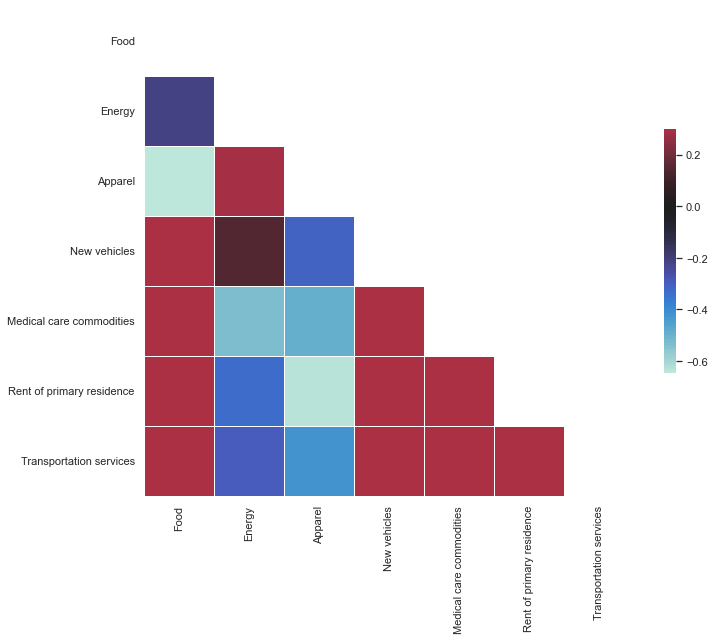

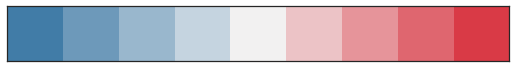

In [16]:
sns.set_theme(style="white")

corr = raw_cpi.corr()

f, ax = plt.subplots(figsize=(11, 9))

mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.palplot(sns.diverging_palette(240, 10, n=9))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

0.6853814819270331


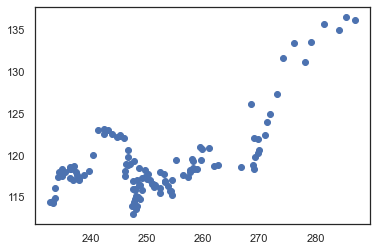

In [17]:
Food_corr = Food['CPI'].corr(Food['PPI'])
plt.scatter(x = 'CPI', y = 'PPI', data = Food)
print(Food_corr)

0.7981560820871518


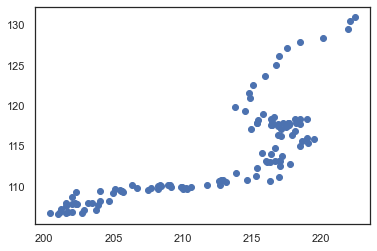

In [18]:
Com_corr = Commodity['CPI'].corr(Commodity['PPI'])
plt.scatter(x = 'CPI', y = 'PPI', data = Commodity)
print(Com_corr)

0.9887877373039946


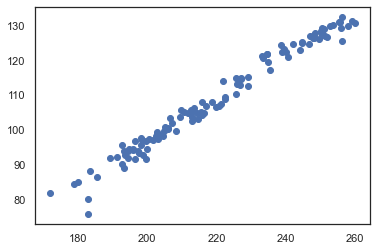

In [19]:
Energy_corr = Energy['CPI'].corr(Energy['PPI'])
plt.scatter(x = 'CPI', y = 'PPI', data = Energy)
print(Energy_corr)

0.7492957133129803


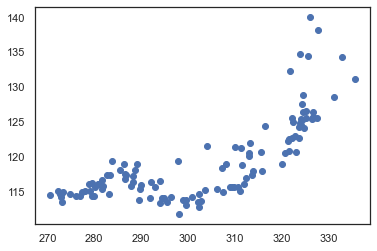

In [20]:
Trans_corr = Transportation['CPI'].corr(Transportation['PPI'])
plt.scatter(x = 'CPI', y = 'PPI', data = Transportation)
print(Trans_corr)